In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, fetch_california_housing, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier


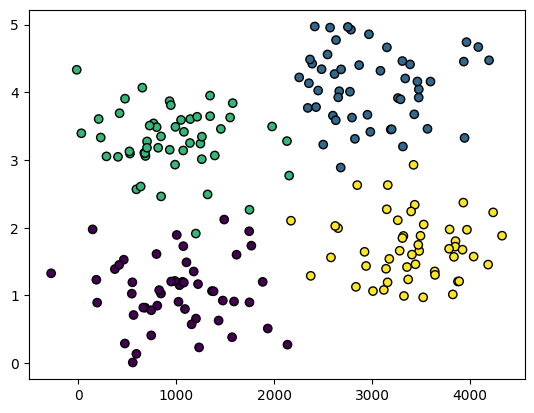

In [2]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [4]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [5]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

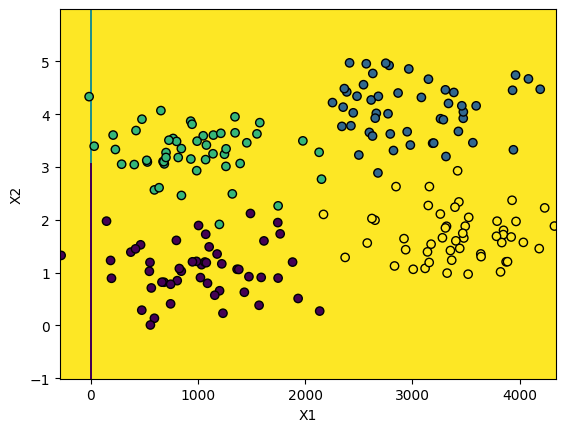

In [6]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X, y)
X_scaled = scaler.transform(X)

In [9]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X_scaled, y)
confusion_matrix(y, clf.predict(X))

CPU times: user 72.8 ms, sys: 0 ns, total: 72.8 ms
Wall time: 72.4 ms


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[ 0,  0,  1, 49],
       [ 0,  0,  0, 50],
       [ 0,  0,  1, 49],
       [ 0,  0,  0, 50]])

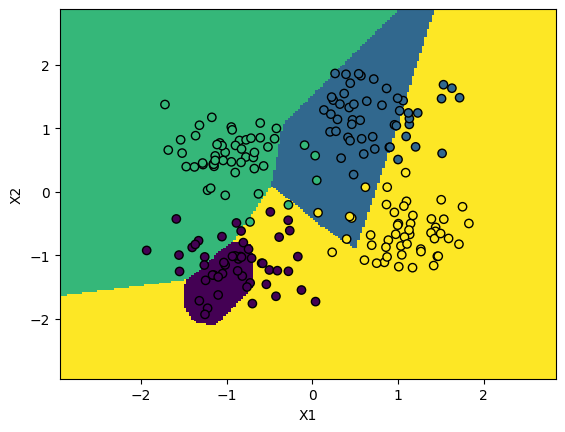

In [10]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.91046201
Iteration 2, loss = 1.90548258
Iteration 3, loss = 1.90052138
Iteration 4, loss = 1.89558391
Iteration 5, loss = 1.89066695
Iteration 6, loss = 1.88577158
Iteration 7, loss = 1.88089957
Iteration 8, loss = 1.87604999
Iteration 9, loss = 1.87122606
Iteration 10, loss = 1.86642678
Iteration 11, loss = 1.86165101
Iteration 12, loss = 1.85689771
Iteration 13, loss = 1.85216702
Iteration 14, loss = 1.84745902
Iteration 15, loss = 1.84277577
Iteration 16, loss = 1.83811680
Iteration 17, loss = 1.83348094
Iteration 18, loss = 1.82886821
Iteration 19, loss = 1.82427861
Iteration 20, loss = 1.81971214
Iteration 21, loss = 1.81517084
Iteration 22, loss = 1.81065648
Iteration 23, loss = 1.80616555
Iteration 24, loss = 1.80169769
Iteration 25, loss = 1.79725275
Iteration 26, loss = 1.79283057
Iteration 27, loss = 1.78843626
Iteration 28, loss = 1.78406628
Iteration 29, loss = 1.77972039
Iteration 30, loss = 1.77540128
Iteration 31, loss = 1.77111049
Iteration 32, los

In [12]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  1, 49],
       [ 0,  0,  0, 50],
       [ 0,  0,  1, 49],
       [ 0,  0,  0, 50]])

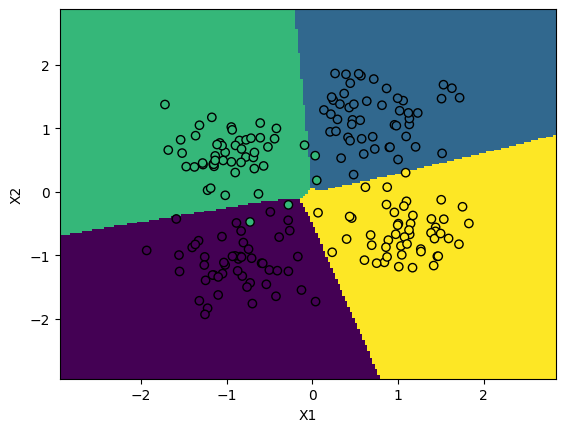

In [13]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)
confusion_matrix(y, clf.predict(X))

array([[ 1, 49,  0,  0],
       [ 0, 50,  0,  0],
       [ 1, 49,  0,  0],
       [ 0, 50,  0,  0]])

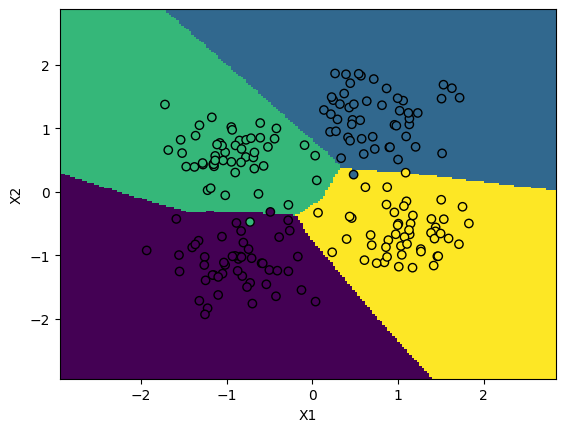

In [15]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [ ]:
for i in [1, 2, 10, 100]:
    clf = MLPClassifier(hidden_layer_sizes=(i,), max_iter=10_000).fit(X_scaled, y)
    print(confusion_matrix(y, clf.predict(X_scaled)))
    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{i} нейронов')
    plt.show()

# 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]


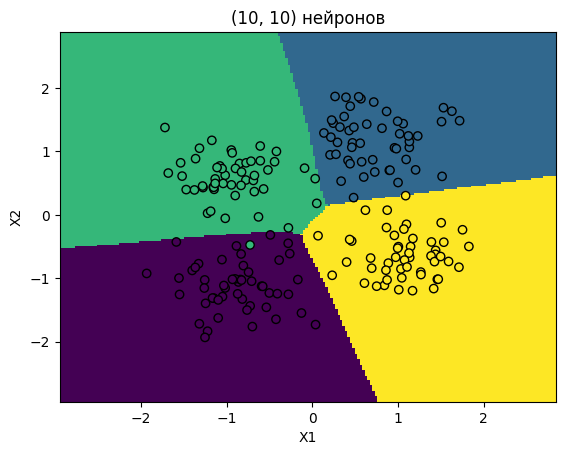

[[50  0  0  0]
 [ 0 50  0  0]
 [ 2  0 48  0]
 [ 1  0  0 49]]


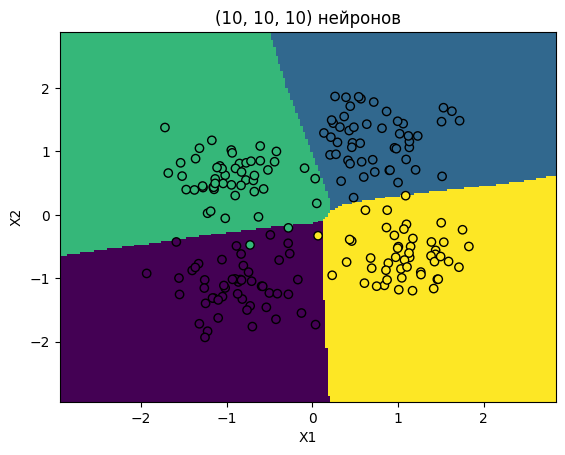

[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  1 49  0]
 [ 0  0  0 50]]


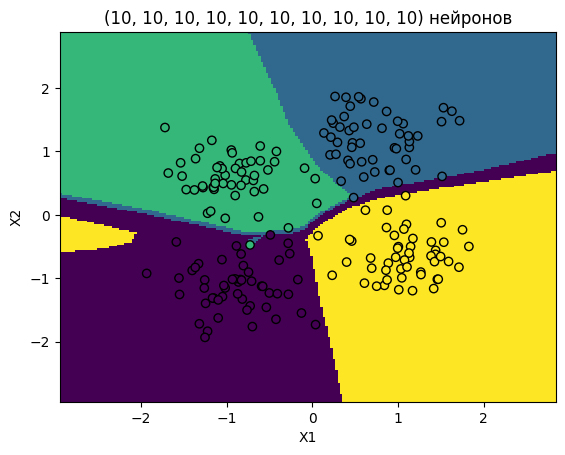

In [16]:
for i in [(10, 10), (10, 10, 10), (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)]:
    clf = MLPClassifier(hidden_layer_sizes=i, max_iter=10_000).fit(X_scaled, y)
    print(confusion_matrix(y, clf.predict(X_scaled)))
    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{i} нейронов')
    plt.show()

# 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [17]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

0 0 [0.23327844 1.0799587 ], 
0 1 [ 0.32232432 -0.21448716], 
0 2 [0.59614437 0.48330209], 
0 3 [-0.38474128  0.15630741], 
0 4 [-0.39649223 -0.35098388], 
0 5 [-0.03011994  0.58090122], 
0 6 [ 0.56900063 -0.62311275], 
0 7 [ 0.28028882 -0.35777361], 
0 8 [-0.45363044  0.37875492], 
0 9 [-0.65061556 -0.7328514 ], 

1 0 [-0.07019967 -0.48574477 -0.81731224  0.24297136 -0.32568413  0.28633471
  0.04857894 -0.16293428  0.02008589 -0.01695577], 
1 1 [ 0.82020568  0.0794482  -0.01810952  0.02067641  0.44634813  0.35425434
 -0.01283329 -0.18634565  0.55151601 -0.56020468], 
1 2 [ 3.11266621e-03  1.16957806e-01 -1.94777773e-02  1.04154281e-02
 -7.94893771e-02 -1.23501970e-01  4.37038955e-04 -1.73591211e-02
 -5.75831454e-07 -1.50688847e-01], 
1 3 [-0.02692837  0.13774433 -0.22945173 -0.53369804 -0.29302796 -0.68791465
  0.44836215  0.18049779 -0.60009468  0.02558136], 
1 4 [ 9.91176364e-05 -5.82479681e-02  6.70802679e-02  1.67674741e-01
 -2.67660031e-02 -1.14945282e-02 -1.28741715e-03 -1.84891

# 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]


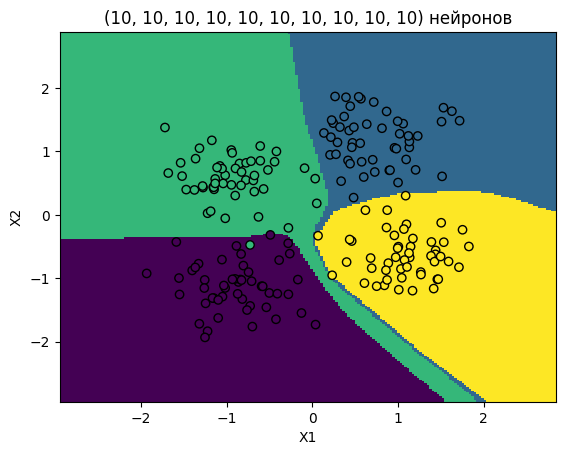

CPU times: user 865 ms, sys: 118 ms, total: 983 ms
Wall time: 858 ms


In [18]:
%%time
i = (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
clf = MLPClassifier(hidden_layer_sizes=i, max_iter=10_000).fit(X_scaled, y)
print(confusion_matrix(y, clf.predict(X_scaled)))
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'{i} нейронов')
plt.show()

[[50  0  0  0]
 [ 0 50  0  0]
 [ 2  0 48  0]
 [ 0  0  0 50]]


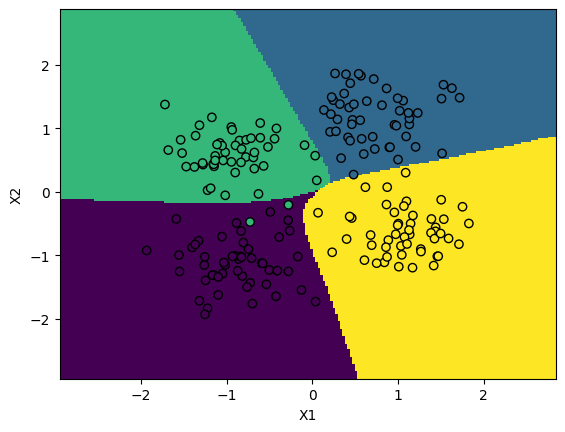

CPU times: user 36.9 s, sys: 2.9 s, total: 39.8 s
Wall time: 21.4 s


In [19]:
%%time
clf = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000), max_iter=10_000).fit(X_scaled, y)
print(confusion_matrix(y, clf.predict(X_scaled)))
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [55]:
from sklearn.datasets import fetch_covtype

cov = fetch_covtype()

X = cov.data
y = cov.target

X, y

(array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([5, 5, 2, ..., 3, 3, 3], dtype=int32))

In [61]:
clf_ = MLPClassifier(hidden_layer_sizes=(6, 6, 6, 6),
                    random_state=1,
                    max_iter = 10_000).fit(X, y)

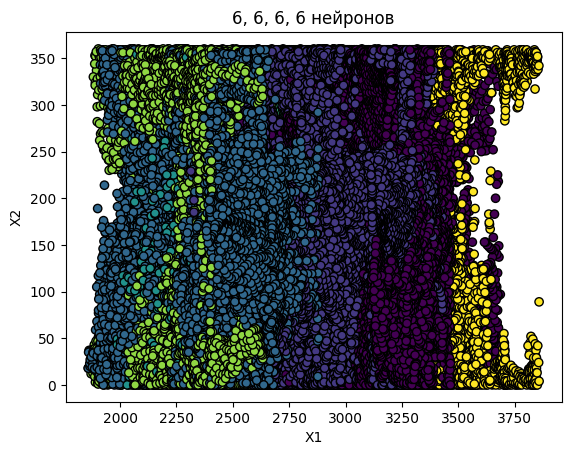

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('6, 6, 6, 6 нейронов')
plt.show()

In [65]:
mean_squared_error(y, clf_.predict(X))

1.6756486957240126

# 6.Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
regr =MLPRegressor(random_state=1, max_iter=100).fit(X, y)

mean_squared_error(y, regr.predict(X))